In [54]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [55]:
dataset = pd.read_csv("dataset.csv")
dataset["creatinine"].fillna(dataset["creatinine"].mean(),inplace = True)
dataset["po2"].fillna(dataset["po2"].mean(),inplace = True)
dataset["fio2"].fillna(dataset["fio2"].mean(),inplace = True)
dataset["pco2"].fillna(dataset["pco2"].mean(),inplace = True)
dataset["bp_min"].fillna(dataset["bp_min"].mean(),inplace = True)
dataset["bp_max"].fillna(dataset["bp_max"].mean(),inplace = True)
dataset["pain"].fillna(dataset["pain"].mean(),inplace = True)
dataset["k"].fillna(dataset["k"].mean(),inplace = True)
dataset["hr_min"].fillna(dataset["hr_min"].mean(),inplace = True)
dataset["hr_max"].fillna(dataset['hr_max'].mean(),inplace = True)
dataset["gcs_min"].fillna(dataset["gcs_min"].mean(),inplace = True)
dataset["gcs_max"].fillna(dataset["gcs_max"].mean(),inplace = True)
dataset["bun"].fillna(dataset["bun"].mean(),inplace = True)
dataset["hco3"].fillna(dataset["hco3"].mean(),inplace = True)
dataset["airway"].fillna(dataset["airway"].mean(),inplace = True)
dataset["resp_min"].fillna(dataset["resp_min"].mean(),inplace = True)
dataset["resp_max"].fillna(dataset["resp_max"].mean(),inplace = True)
dataset["haemoglobin"].fillna(dataset["haemoglobin"].mean(),inplace = True)
dataset["spo2_min"].fillna(dataset["spo2_min"].mean(),inplace = True)
dataset["spo2_max"].fillna(dataset["spo2_max"].mean(),inplace = True)
dataset["temp_min"].fillna(dataset["temp_min"].mean(),inplace = True)
dataset["temp_max"].fillna(dataset["temp_max"].mean(),inplace = True)
dataset["na"].fillna(dataset["na"].mean(),inplace = True)

features = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','airway','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']
x = dataset[features]
y= dataset['outcome']

In [56]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)
sc=StandardScaler()
sc.fit(xtrain)
xtrain=sc.transform(xtrain)
xtest=sc.transform(xtest)

In [61]:
mlp_clf=MLPClassifier(max_iter=2000)
mlp_clf.fit(xtrain,ytrain)
mlp_pred=mlp_clf.predict(xtest)

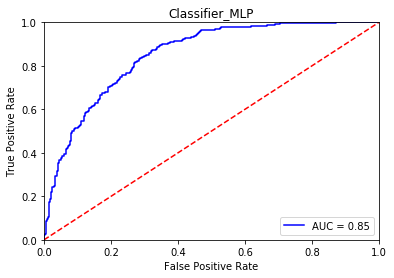

In [62]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, mlp_clf.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier_MLP')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
import math
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [float(x) for x in np.linspace(0.0001, 0.1, num=10)],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle = True,random_state=0)
mlp_random = RandomizedSearchCV(estimator=MLPClassifier(max_iter=3000,random_state=0), param_distributions = random_grid, n_iter=100, cv=kfold, verbose=2, random_state=0,scoring='roc_auc',refit=True,n_jobs=-1)
mlp_random.fit(xtrain, ytrain)
print(mlp_random.best_params_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 26.6min finished


{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.055600000000000004, 'activation': 'logistic'}


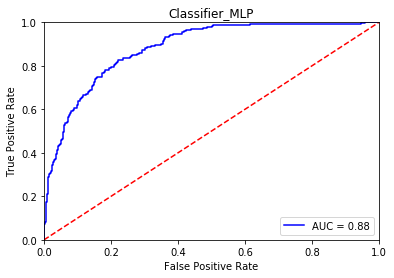

In [64]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, mlp_random.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier_MLP')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

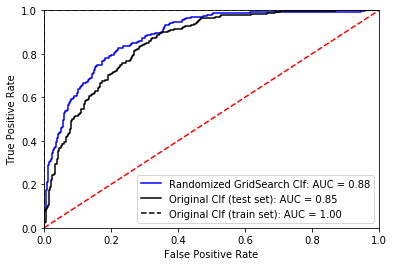

In [65]:
fpr, tpr, threshold = metrics.roc_curve(ytest, mlp_random.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Randomized GridSearch Clf: AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytest, mlp_clf.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k', label = 'Original Clf (test set): AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytrain, mlp_clf.predict_proba(xtrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'Original Clf (train set): AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, mlp_pred)
print ("Original Confusion Matrix: \n", cm)
from sklearn.metrics import accuracy_score
print ("Original Accuracy: ", accuracy_score(ytest, mlp_pred))
from sklearn.metrics import precision_score, recall_score, f1_score
print ('Original Precision:',precision_score(ytest,mlp_pred))
print ('Original recall:',recall_score(ytest,mlp_pred))
print ('Original f1:',f1_score(ytest,mlp_pred))

Original Confusion Matrix: 
 [[340 103]
 [ 85 264]]
Original Accuracy:  0.7626262626262627
Original Precision: 0.7193460490463215
Original recall: 0.7564469914040115
Original f1: 0.7374301675977654


In [68]:
cm1 = confusion_matrix(ytest,mlp_random.predict(xtest))
mlprandom_pred=mlp_random.predict(xtest)
print ("GSCV Confusion Matrix: \n", cm1)
print ("GSCV Accuracy: ", accuracy_score(ytest, mlprandom_pred))
print ('GSCV Precision:',precision_score(ytest, mlprandom_pred))
print ('GSCV Recall:',recall_score(ytest, mlprandom_pred))
print ('GSCV f1:',f1_score(ytest,mlprandom_pred))

GSCV Confusion Matrix: 
 [[356  87]
 [ 74 275]]
GSCV Accuracy:  0.7967171717171717
GSCV Precision: 0.7596685082872928
GSCV Recall: 0.7879656160458453
GSCV f1: 0.7735583684950774
